In [ ]:
!pip install -U libsvm-official

  Preparing metadata (setup.py) ... done
  Created wheel for libsvm-official: filename=libsvm_official-3.32.0-cp310-cp310-linux_x86_64.whl size=123884 sha256=5b04fb871f577ea0f0aac5eb3e6e58b8504d1f0a06b0767d4175ab601c4fee89
  Stored in directory: /root/.cache/pip/wheels/61/3b/1b/73bb4869517f96a26c82b47ccdb9ec48f12f4466de2371eff6
Successfully built libsvm-official


In [ ]:
# Problem 9
from libsvm.svmutil import *


C = [0.1, 1, 10]
Q = [2,3,4]
smallest = 10000
c_smallest = 0
q_smallest = 0
# K(xn, xm) = (1 + xTn * xm)^Q
# (gammau'v + coef0)^degree
for i in range(3):
    for j in range(3):
      print("Training...")
      y, x = svm_read_problem('train.dat')
      # print(len(y))
      for k in range(len(y)):
        if y[k] == 4:
          y[k] = 1
        else:
          y[k] = -1
      # print(len(y))
      prob = svm_problem(y, x)
      param = svm_parameter(f'-t 1 -c {C[i]} -d {Q[j]} -r 1 -g 1')
      model = svm_train(prob, param)
      sv = model.get_SV()
      # print(len(sv))
      if len(sv) < smallest:
        smallest = len(sv)
        c_smallest = C[i]
        q_smallest = Q[i]
      svm_save_model('model_svm', model)
      # p_label, p_acc, p_val = svm_predict(y, x, model)

      # print("p_acc: ", p_acc)

      # print("Testing...")
      # yt, xt = svm_read_problem('test.dat')
      # p_label, p_acc, p_val = svm_predict(yt, xt, model)

print(f"smallest number of support vectors: {smallest}\n")
print(f"c* = {c_smallest} q* = {q_smallest}\n")

Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
Training...
smallest number of support vectors: 629

c* = 10 q* = 4



In [ ]:
# Problem 10
from libsvm.svmutil import *


C = [0.01, 0.1, 1, 10, 100]
acc_largest = 0
c_smallest = 0
# K(xn, xm) = exp(−γ||xn − xm||2) γ = 1
# exp(-gamma|u-v|^2)
for i in range(3):
    print("Training...")
    y, x = svm_read_problem('train.dat')
    for k in range(len(y)):
      if y[k] == 1:
        y[k] = 1
      else:
        y[k] = -1
    prob = svm_problem(y, x)
    param = svm_parameter(f'-t 2 -c {C[i]} -r 1 -g 1')
    model = svm_train(prob, param)
    svm_save_model('model_svm', model)
    p_label, p_acc, p_val = svm_predict(y, x, model)

    print("p_acc: ", p_acc)

    print("Testing...")
    yt, xt = svm_read_problem('test.dat')
    for k in range(len(yt)):
      if yt[k] == 1:
        yt[k] = 1
      else:
        yt[k] = -1
    p_label, p_acc, p_val = svm_predict(yt, xt, model)
    if p_acc[0]/100 > acc_largest:
      acc_largest = p_acc[0]/100
      c_smallest = C[i]

print(f"lowest Eout = {1 - acc_largest}")
print(f"c* = {c_smallest}\n")


Training...
Accuracy = 95.8512% (4251/4435) (classification)
p_acc:  (95.85118376550169, 0.16595264937993234, 0.7843406650539752)
Testing...
Accuracy = 95.4% (1908/2000) (classification)
Training...
Accuracy = 98.5569% (4371/4435) (classification)
p_acc:  (98.55693348365277, 0.057722660653889514, 0.9224173069299814)
Testing...
Accuracy = 98.8% (1976/2000) (classification)
Training...
Accuracy = 99.752% (4424/4435) (classification)
p_acc:  (99.75197294250282, 0.00992108229988726, 0.9865298486758866)
Testing...
Accuracy = 99.5% (1990/2000) (classification)
lowest Eout = 0.0050000000000000044
c* = 1



串流輸出內容已截斷至最後 5000 行。
Accuracy = 96% (192/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 99.5% (199/200) (classification)
Accuracy = 99.5% (199/200) (classification)
Accuracy = 99.5% (199/200) (classification)
c* = 1
best_C = [0, 63, 139, 171, 3]

Accuracy = 96.5% (193/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 100% (200/200) (classification)
Accuracy = 100% (200/200) (classification)
c* = 10
best_C = [0, 63, 139, 172, 3]

Accuracy = 95% (190/200) (classification)
Accuracy = 98% (196/200) (classification)
Accuracy = 98% (196/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 99% (198/200) (classification)
c* = 10
best_C = [0, 63, 139, 173, 3]

Accuracy = 96% (192/200) (classification)
Accuracy = 97% (194/200) (classification)
Accuracy = 98.5% (197/200) (classification)
Accuracy = 98.5% (197/200) (classification)
Accuracy = 98.5% (197/200) (classification)
c* = 1


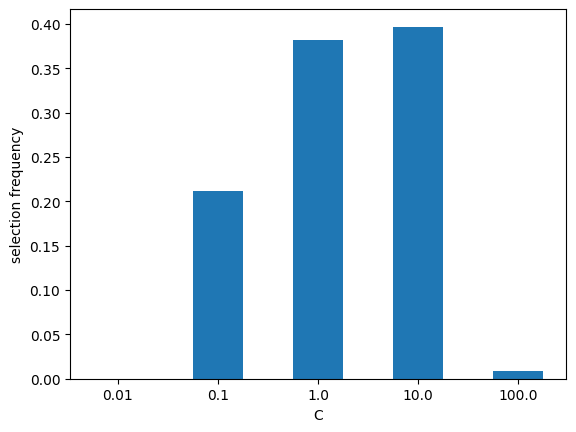

In [8]:
# problem 11
from libsvm.svmutil import *
from matplotlib import pyplot as plt
import random
import numpy as np

C = [0.01, 0.1, 1, 10, 100]
best_C = [0,0,0,0,0]
classify_num = 1
total_timesteps = 1000

# K(xn, xm) = exp(−γ||xn − xm||2) γ = 1
# exp(-gamma|u-v|^2)

for timestep in range(total_timesteps):
    acc_largest = 0
    c_smallest = 1000
    # print("Training...")
    data = []

    with open('train.dat', 'r') as f:
      data = f.readlines()

    random.seed(timestep*timestep)
    random.shuffle(data)
    # print(len(data))

    with open('train_shuffle.dat',"w") as f:
      for d in data:
        f.write(d)

    y, x = svm_read_problem('train_shuffle.dat')

    for k in range(len(y)):
      if y[k] == classify_num:
        y[k] = 1
      else:
        y[k] = -1

    train_x = x[200:]
    train_y = y[200:]
    valid_x = x[:200]
    valid_y = y[:200]

    for i in range(len(C)):
        prob = svm_problem(train_y, train_x)
        param = svm_parameter(f'-t 2 -c {C[i]} -r 1 -g 1')
        model = svm_train(prob, param)
        svm_save_model('model_svm', model)
        p_label, p_acc, p_val = svm_predict(valid_y, valid_x, model)

        # print("p_acc: ", p_acc)

        if p_acc[0]/100 >= acc_largest:
          if p_acc[0]/100 == acc_largest and C[i] < c_smallest:
            c_smallest = C[i]
          elif p_acc[0]/100 == acc_largest and C[i] > c_smallest:
            continue
          else:
            acc_largest = p_acc[0]/100
            c_smallest = C[i]

    best_C[C.index(c_smallest)] += 1
    print(f"c* = {c_smallest}")
    print(f"best_C = {best_C}\n")

plt.bar(np.arange(len(C)), np.array(best_C)/total_timesteps, width = 0.5, tick_label=C)
plt.xlabel('C')
plt.ylabel('selection frequency')
# plt.show()
plt.savefig('problem11.png')


Training...
1530
Accuracy = 93.7091% (4156/4435) (classification)
Testing...
Accuracy = 95.35% (1907/2000) (classification)
Training...
941
Accuracy = 95.8512% (4251/4435) (classification)
Testing...
Accuracy = 95.85% (1917/2000) (classification)
Training...
808
Accuracy = 97.5197% (4325/4435) (classification)
Testing...
Accuracy = 96.4% (1928/2000) (classification)
Training...
757
Accuracy = 99.0981% (4395/4435) (classification)
Testing...
Accuracy = 95.95% (1919/2000) (classification)
Training...
748
Accuracy = 100% (4435/4435) (classification)
Testing...
Accuracy = 95.45% (1909/2000) (classification)
[17.591375503037987, 46.44587231949129, 87.4856176980916, 102.58834218938105, 159.00656294579625]


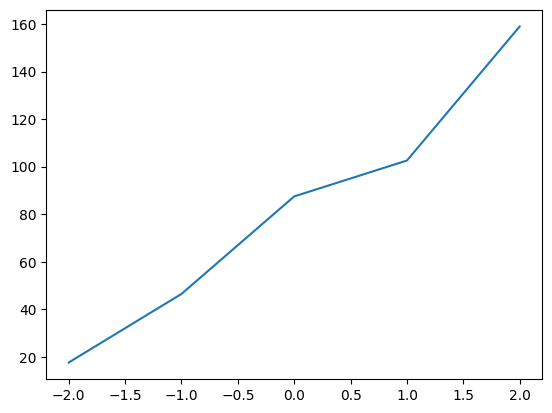

In [ ]:
# Problem 12
from libsvm.svmutil import *
from matplotlib import pyplot as plt
import numpy as np

C = [0.01, 0.1, 1, 10, 100]
W = []
classify_num = 3

# K(xn, xm) = exp(−γ||xn − xm||2) γ = 1
# exp(-gamma|u-v|^2)

for i in range(len(C)):
    print("Training...")
    y, x = svm_read_problem('train.dat')
    for k in range(len(y)):
      if y[k] == classify_num:
        y[k] = 1
      else:
        y[k] = -1


    prob = svm_problem(y, x)
    param = svm_parameter(f'-t 2 -c {C[i]} -r 1 -g 1')
    model = svm_train(prob, param)
    svm_save_model('model_svm', model)
    support_vector_coefs = [i[0] for i in model.get_sv_coef()]
    sv = model.get_SV()
    Wn = np.zeros(36)

    for n in range(len(sv)):
      coef = support_vector_coefs[n]
      SV = []
      for k in range(36):
        if k+1 in sv[n]:
          SV.append(sv[n][k+1])
        else:
          SV.append(0)
      Wn += np.array(SV) * coef

    print(len(support_vector_coefs))
    p_label, p_acc, p_val = svm_predict(y, x, model)
    # print("p_acc: ", p_acc[0])

    print("Testing...")
    yt, xt = svm_read_problem('test.dat')
    for k in range(len(yt)):
      if yt[k] == classify_num:
        yt[k] = 1
      else:
        yt[k] = -1
    p_label, p_acc, p_val = svm_predict(yt, xt, model)

    W.append(np.linalg.norm(np.array(Wn)))

# plt.plot(C, W, 'bo--', linewidth=2, markersize=6)
print(W)
plt.plot(np.log10(C), W)
plt.savefig('problem_12.png')
